In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
store_data = pd.read_csv('SuperMarket Analysis - SuperMarket Analysis.csv')

In [11]:
store_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


## EDA 

In [12]:
store_data.shape

(1000, 17)

In [13]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [14]:
store_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [15]:
store_data.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Sales                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [16]:
store_data['Branch'].unique()


array(['Alex', 'Giza', 'Cairo'], dtype=object)

In [17]:
store_data['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [18]:
store_data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [19]:
store_data.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [20]:
# converting date to pandas datetime format
store_data['Date'] = pd.to_datetime(store_data['Date'])

In [21]:
store_data['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [22]:
# Convert Time column to datetime format
store_data['Time'] = pd.to_datetime(store_data['Time'], format='%I:%M:%S %p')

# Extract Hour (0–23) for EDA
store_data['Hour'] = store_data['Time'].dt.hour


In [23]:
store_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10


In [24]:
# what products sells more in particular city
pd.crosstab(store_data['City'],store_data['Product line'])

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,55,62,50,53,50,62
Naypyitaw,55,65,66,52,45,45
Yangon,60,51,58,47,65,59


In [25]:
# what products sells more in particular branch?
pd.crosstab(store_data['Branch'],store_data['Product line'])

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
Alex,60,51,58,47,65,59
Cairo,55,62,50,53,50,62
Giza,55,65,66,52,45,45


In [26]:
# In which city females shops more?
store_data[store_data['Gender'] == 'Female']['City'].value_counts()

City
Naypyitaw    200
Yangon       187
Mandalay     184
Name: count, dtype: int64

In [27]:
# which type of product line sold more
store_data['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [28]:
# which city most used credit card for payment
store_data[store_data['Payment'] == 'Credit card']['City'].value_counts()

City
Mandalay     109
Yangon       104
Naypyitaw     98
Name: count, dtype: int64

In [29]:
# which city made more sales
store_data.groupby('City')['Sales'].sum().sort_values()

City
Mandalay     106197.6720
Yangon       106200.3705
Naypyitaw    110568.7065
Name: Sales, dtype: float64

In [30]:
# what type of members bought what type of product
pd.crosstab(store_data['Customer type'],store_data['Product line'])

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,90,96,104,86,92,97
Normal,80,82,70,66,68,69


In [31]:
# avg rating for each city
store_data.groupby('City')['Rating'].mean()

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64

In [32]:
store_data.groupby('Gender')['Rating'].mean()

Gender
Female    6.959720
Male      6.989977
Name: Rating, dtype: float64

In [33]:
store_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10


## data visualzation

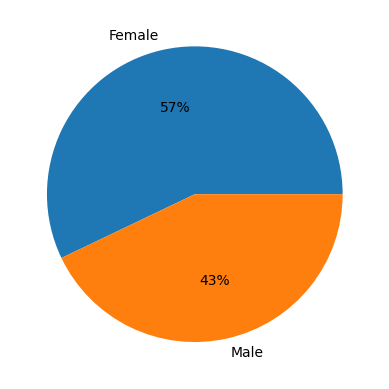

In [34]:
plt.pie(x = store_data['Gender'].value_counts(),data = store_data,autopct='%.0f%%',labels = ['Female','Male'])
plt.show()

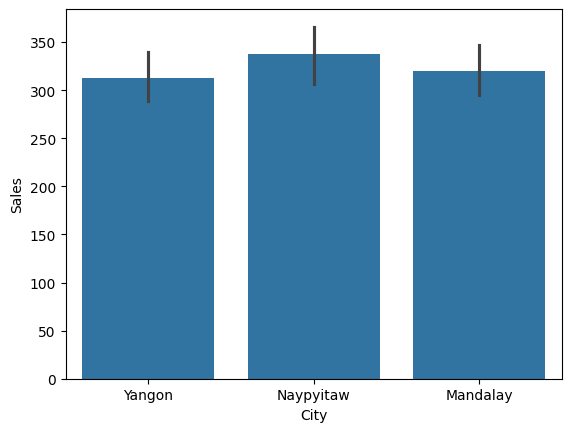

In [35]:
# which city has the highest average sales?

sns.barplot(data = store_data, x = store_data['City'],y = store_data['Sales'])
plt.show()

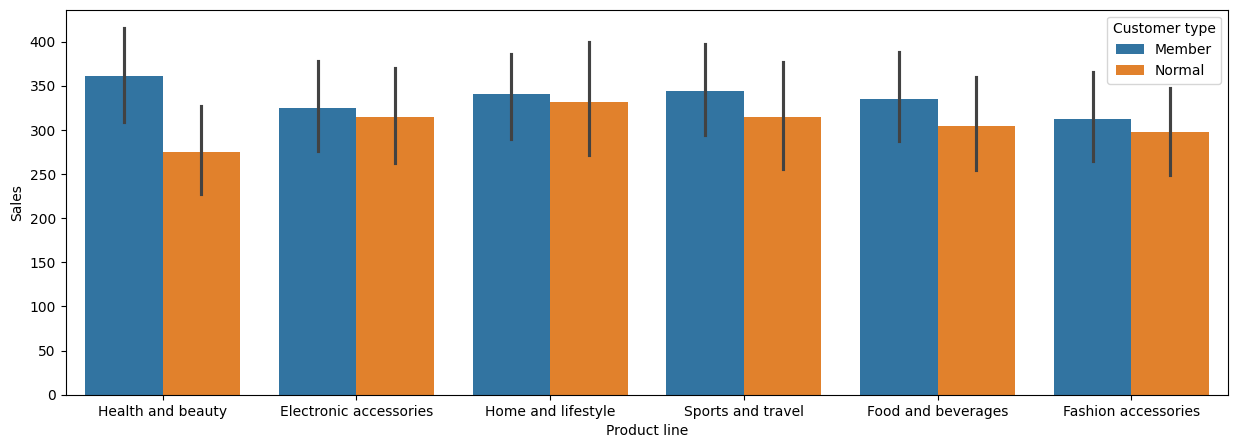

In [36]:
# how does sales vary from product line from  members
plt.figure(figsize=(15,5))
sns.barplot(data = store_data, x = store_data['Product line'],y = store_data['Sales'], hue = "Customer type")
plt.show()

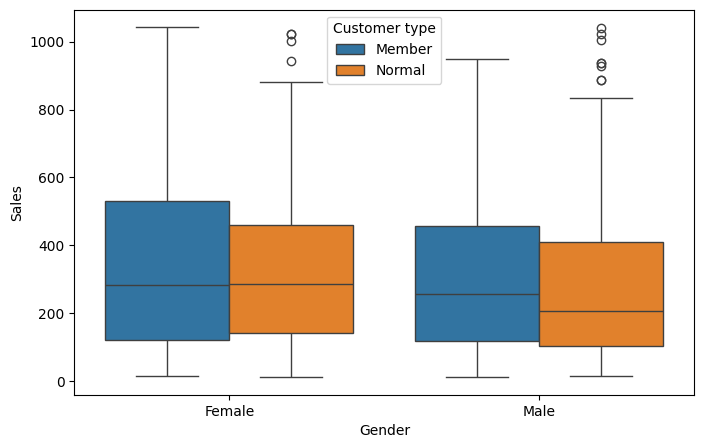

In [37]:
# On average who spend more by customer type?
plt.figure(figsize=(8,5))
sns.boxplot(data = store_data, x = "Gender", y = "Sales", hue = 'Customer type')
plt.show()

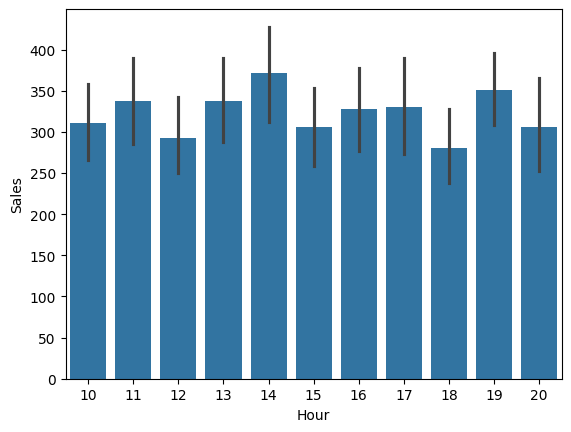

In [38]:
# what are busiest hour for shopping
sns.barplot(data = store_data, x = 'Hour', y = 'Sales')
plt.show()

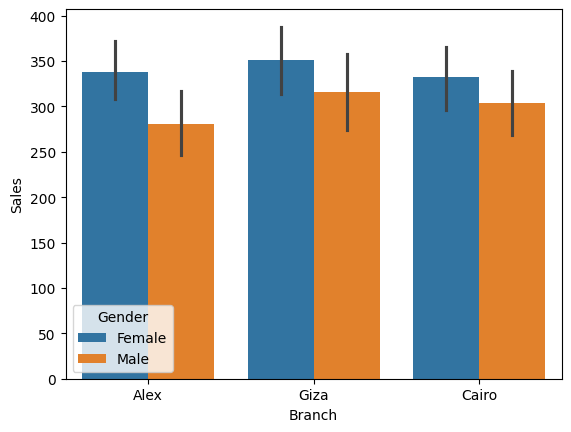

In [39]:
# Which branch has the highest average sales by gender?
sns.barplot(data = store_data, x = 'Branch', y = store_data['Sales'], hue = 'Gender')
plt.show()

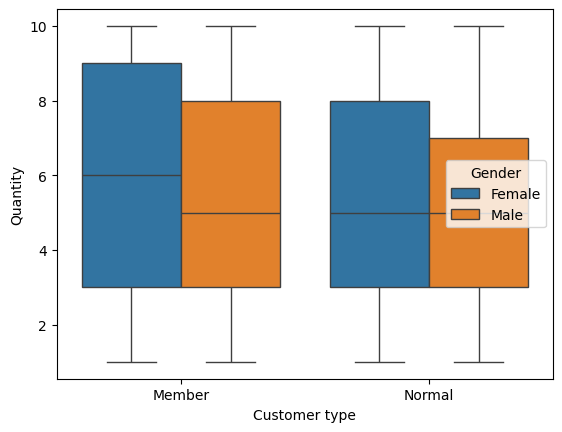

In [40]:
# Is members purchase more quantities than normal customers?
sns.boxplot(data = store_data, x = 'Customer type', y = 'Quantity', hue = 'Gender')
plt.show()

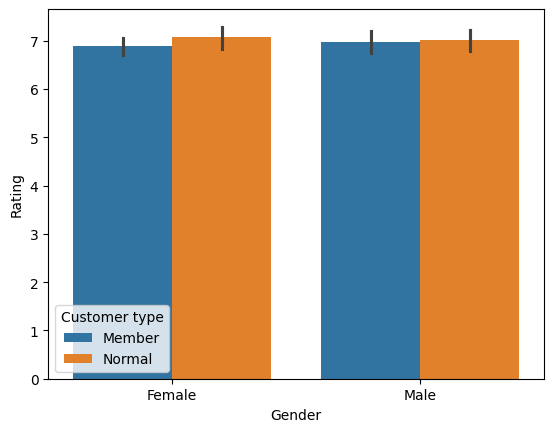

In [41]:
# average rating by customers
sns.barplot(data = store_data, x = 'Gender', y = 'Rating', hue = 'Customer type')
plt.show()

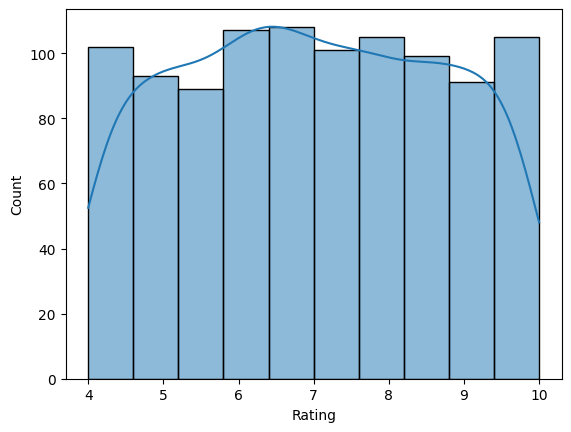

In [42]:
#overall rating by customers
sns.histplot(store_data['Rating'],bins=10, kde=True)
plt.show()

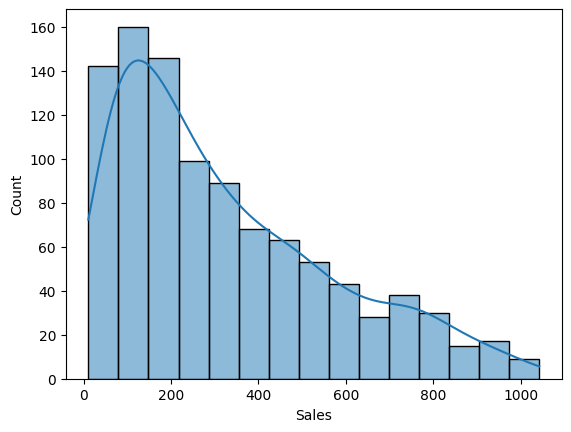

In [43]:
#Overall sales performance
sns.histplot(data = store_data, x = 'Sales',kde = True) 
plt.show()